In [11]:
from data_format import *
import os
from PIL import Image
import numpy as np
import tifffile

In [12]:
root_dir = "/mnt/efs/shared_data/restorators/spheres/images"

In [13]:
img_path = os.path.join(root_dir, "0001_sphere.tiff")
image = Image.open(img_path)

UnidentifiedImageError: cannot identify image file '/mnt/efs/shared_data/restorators/spheres/images/0001_sphere.tiff'

In [ ]:
img = tifffile.imread(img_path)
n_lenses = 16
n_pix = 16
pin_img = transform_into_pinhole_2channels(img, n_lenses, n_pix)

In [ ]:
pin_stack = np.zeros(((n_pix * n_pix), n_lenses, n_lenses))
block_list = []
for i in range(n_pix):
    for j in range(n_pix):
        block = pin_img[0][i*16:(i+1)*16, j*16:(j+1)*16]
        # pin_stack[i]
        block_list.append(block)
        plt.imshow(block)

In [ ]:
def separate_into_blocks(image):
    # Ensure the image is of the right size
    assert image.shape == (256, 256) or image.shape == (256, 256, 3)
    
    blocks = []
    
    # Iterate over the 16x16 blocks in the image
    for i in range(16):
        for j in range(16):
            # Extract 16x16 block from input image
            block = image[i*16:(i+1)*16, j*16:(j+1)*16]
            blocks.append(block)
    
    return blocks

def plot_image_list(images, ncols=16):
    """
    Plots a list of images.
    """
    n = len(images)
    nrows = n // ncols + (1 if n % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols, nrows))
    
    # Handle the case of a single row or single column of images
    if nrows == 1:
        axes = np.expand_dims(axes, axis=0)
    if ncols == 1:
        axes = np.expand_dims(axes, axis=1)
    
    # Iterate over each axes and plot the corresponding image
    for ax, img in zip(axes.ravel(), images):
        ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        ax.axis('off')
    
    # Turn off axes for remaining subplots if any
    for ax in axes.ravel()[len(images):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# For demonstration purposes, let's generate a list of dummy 16x16 images
dummy_images = [np.random.rand(16, 16, 3) for _ in range(256)]

plot_image_list(dummy_images)

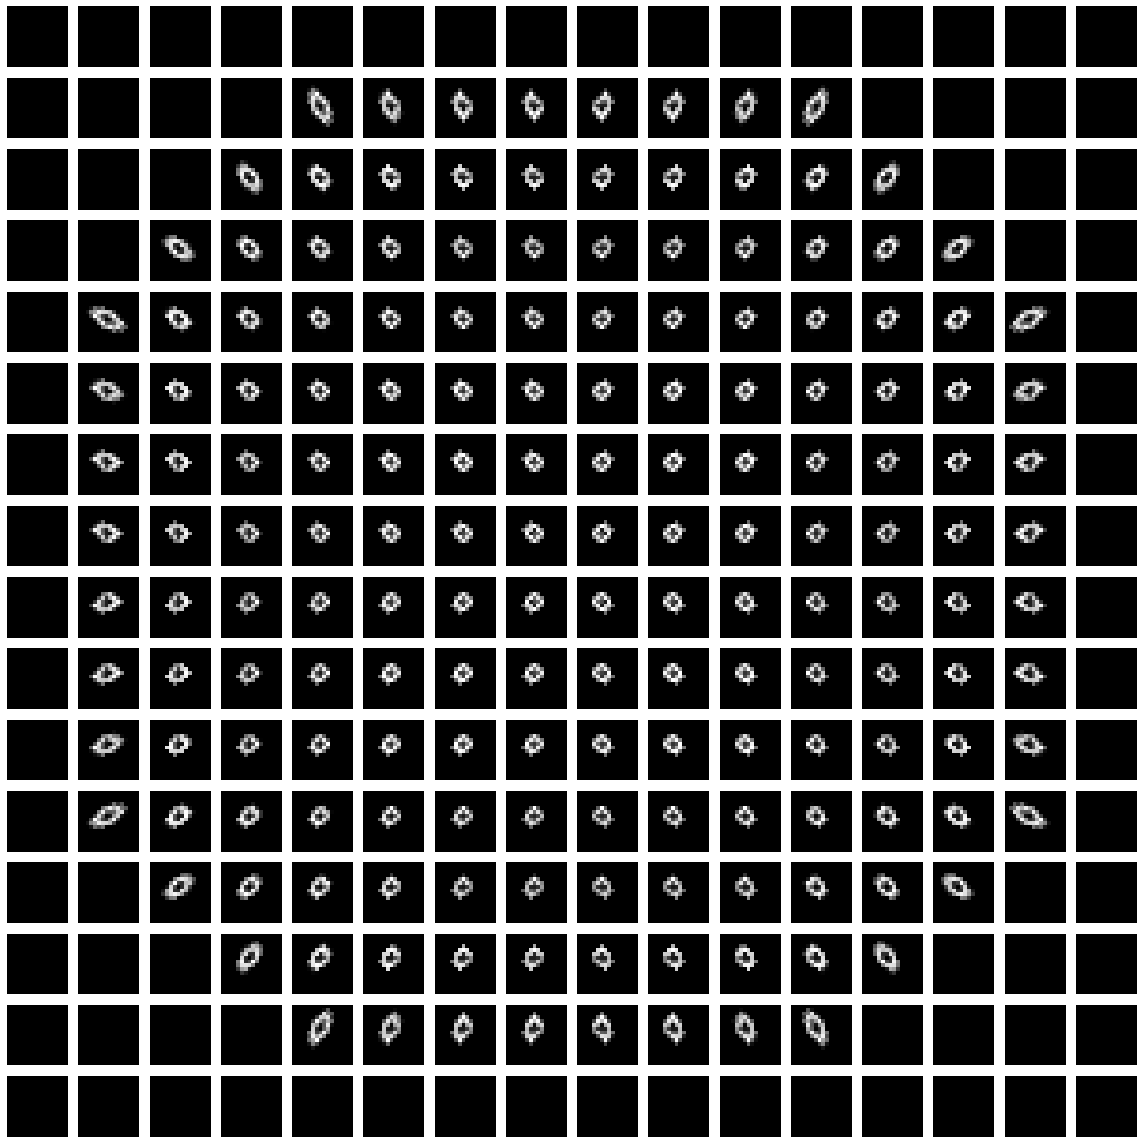

In [ ]:
plot_image_list(block_list)

In [ ]:
def pinhole2stack(img, n_lenses, n_pix):
    '''Transforms a pinhole perspective LF image into
    a stack of pinhole images.
    Parameters:
        img (np.array): 2D array of shape n_pix*n_lenses squared
        n_lenses (int): number of microlenses
        n_pix (int): number of pixels per microlens
    Returns:
        pinhole_stack (np.array): 3D array of shape 
                                    (n_pix * n_pix, n_lenses, n_lenses)
    '''
    block_list = []
    for i in range(n_pix):
        for j in range(n_pix):
            block = img[i*n_lenses:(i+1)*n_lenses, j*n_lenses:(j+1)*n_lenses]
            block_list.append(block)
    pinhole_stack = np.array(block_list)
    return pinhole_stack

# pin_stack = pinhole2stack(pin_img, 16, 16)

In [ ]:
def concat_pinholes_ret_azim(img, n_lenses, n_pix):
    '''Transforms a pinhole perspective LF images of the retardance and azimuth
    into a stack of pinhole images with retardance and azimuth combined.
    Parameters:
        img (np.array): 3D array of shape (2, n_pix*n_lenses, n_pix*n_lenses)
        n_lenses (int): number of microlenses
        n_pix (int): number of pixels per microlens
    Returns:
        pinhole_stack (np.array): 3D array of shape 
                    (2 * n_pix * n_pix, n_lenses, n_lenses) where the first
                    half of indices come from the retardance image, and the
                    second half come from the azimuth image
    '''
    pin_stack_ret = pinhole2stack(img[0], n_lenses, n_pix)
    pin_stack_azim = pinhole2stack(img[1], n_lenses, n_pix)
    concat_array = np.concatenate((pin_stack_ret, pin_stack_azim), axis=0)
    return concat_array
    

In [ ]:
img_path = os.path.join(root_dir, "0001_sphere.tiff")
# img = Image.open(img_path)
img = tifffile.imread(img_path)
n_lenses = 16
n_pix = 16
pin_img = transform_into_pinhole_2channels(img, n_lenses, n_pix)
concat_pin_img = concat_pinholes_ret_azim(pin_img, n_lenses, n_pix)

NameError: name 'root_dir' is not defined

In [ ]:
save_dir = 'tmp'
save_path = os.path.join(save_dir, "0001_sphere.tiff")
img_path = os.path.join(root_dir, "0001_sphere.tiff")
# img = Image.open(img_path)
img = tifffile.imread(img_path)
n_lenses = 16
n_pix = 16
pin_img = transform_into_pinhole_2channels(img, n_lenses, n_pix)
concat_pin_img = concat_pinholes_ret_azim(pin_img, n_lenses, n_pix)
tifffile.imwrite(save_path, concat_pin_img)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/genevas/conda/envs/09_knowledge_extraction/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/genevas/conda/envs/09_knowledge_extraction/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
data_dir = "/mnt/efs/shared_data/restorators/"
folder = "spheres_prc"
# os.mkdir(os.path.join(data_dir, folder))
os.mkdir(os.path.join(data_dir, folder, "images"))
os.mkdir(os.path.join(data_dir, folder, "objects"))

In [ ]:
!ls "/mnt/efs/shared_data/restorators/spheres_prc"

images	objects


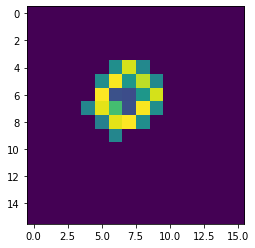

In [ ]:
plt.imshow(pin_stack[150])

In [ ]:
n_lenses = 16
n_pix = 16
root_dir = "/mnt/efs/shared_data/restorators/spheres/images"
save_dir = "/mnt/efs/shared_data/restorators/spheres_prc/images"
img_filenames = os.listdir(os.path.join(root_dir))
for filename in img_filenames:
    img_path = os.path.join(root_dir, filename)
    img = tifffile.imread(img_path)
    pin_img = transform_into_pinhole_2channels(img, n_lenses, n_pix)
    concat_pin_img = concat_pinholes_ret_azim(pin_img, n_lenses, n_pix)
    save_path = os.path.join(root_dir, filename)
    tifffile.imwrite(save_path, concat_pin_img)

In [ ]:
root_dir = "/mnt/efs/shared_data/restorators/spheres/objects"
save_dir = "/mnt/efs/shared_data/restorators/spheres_prc/objects"

In [ ]:
test_img = tifffile.imread("/mnt/efs/shared_data/restorators/spheres/images/0001_sphere.tiff")

In [ ]:
test_img.shape

(512, 16, 16)